### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max scaling is a data preprocessing technique that transforms the numerical features to a specific range, usually between 0 and 1, by applying a linear transformation. It is used to reduce the effect of outliers and scale the features to a common scale.
An example of its application is:

Suppose we have a dataset with two features: age and income, with values ranging from 18 to 65 and from 10,000 to 100,000 respectively.
To apply Min-Max scaling, we use the following formula:

xscaled=(x-xmin)/(xmax-xmin)

Where x is the original value, xmin and xmax are the minimum and maximum values of the feature, and xscaled is the scaled value.
For example, if we want to scale the age feature, we use:

agescaled = (age-18)/(65-18)

This will transform the age values to the range [0, 1], where 18 becomes 0 and 65 becomes 1.

### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

The Unit Vector technique is a feature scaling technique that transforms the values of features or variables in a dataset to have a unit norm, which means the length of the feature vector is one. It is used to reduce the effect of the magnitude of the features and focus on their direction.

The Unit Vector technique differs from Min-Max scaling in the following ways:

Min-Max scaling transforms the values of each feature individually to a specific range, usually between 0 and 1, by applying a linear transformation, while Unit Vector technique transforms the values of each observation vector by dividing it by its norm, which can be either the Manhattan distance (l1 norm) or the Euclidean distance (l2 norm) of the vector.
Min-Max scaling preserves the shape of the original distribution of the features, while Unit Vector technique changes the shape of the distribution and makes it spherical.
Min-Max scaling is sensitive to outliers, while Unit Vector technique is robust to outliers.
An example of its application is:

### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application. 

PCA (Principal Component Analysis) is a dimensionality reduction technique that transforms the features or variables in a dataset to a lower dimensional space by finding the linear combinations of the original features that capture the most variance in the data. It is used to reduce the complexity, noise and redundancy of the data, and to improve the performance and interpretability of machine learning models.

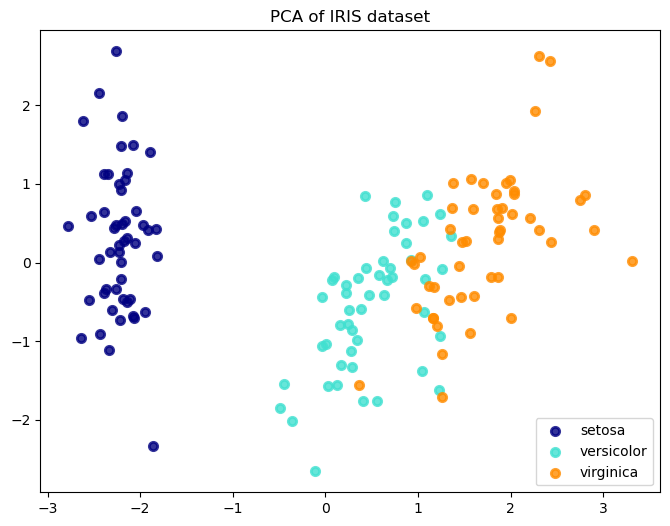

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset (4 features)
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (mean centering and scaling to unit variance)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_std = (X - mean) / std_dev

# Create a PCA instance and fit the data
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_std)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Feature extraction is a process of transforming the original features or variables in a dataset to a new set of features that are more informative, discriminative and compact. It is used to reduce the complexity, noise and redundancy of the data, and to improve the performance and interpretability of machine learning models.

PCA is a feature extraction technique that uses an orthogonal transformation to convert the original features to a lower-dimensional space while maximizing the variance of the data. It aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one. The new features are called principal components (PCs) and they are linear combinations of the original features.

The relationship between PCA and feature extraction is that PCA is one of the methods for feature extraction that can be applied to both supervised and unsupervised learning problems. PCA can be used for feature extraction by following these steps:

Standardize the features to have zero mean and unit variance, which is a common practice before applying PCA.

Compute the covariance matrix of the standardized features, which measures how the features vary with each other.

Compute the eigenvalues and eigenvectors of the covariance matrix, which represent the magnitude and direction of the variance in the data respectively.

Sort the eigenvalues in descending order and choose the top k eigenvalues that correspond to the desired number of PCs.

Form a projection matrix by taking the eigenvectors that correspond to the top k eigenvalues and stacking them as columns.

Transform the original features to the new subspace by multiplying the projection matrix with the standardized features.


In [ ]:
# Original dataset
import numpy as np
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute covariance matrix
cov_mat = np.cov(X_scaled.T)

# Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort eigenvalues in descending order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Choose top k eigenvalues
k = 1 # Number of PCs
w = np.hstack([eig_pairs[i][1].reshape(3,1) for i in range(k)]) # Projection matrix

# Transform original features to new subspace
X_pca = X_scaled.dot(w)

# Check explained variance ratio of PCs
print(eig_vals / sum(eig_vals))

### Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset  contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to  preprocess the data. 

Min-max scaling is a method of rescaling the features to a given range, usually [0, 1] or [-1, 1]. It preserves the shape of the original distribution but reduces the effect of outliers. To preprocess the data using min-max scaling, you would apply the following formula to each feature value:

xscaled=(x-xmin)/(xmax-xmin)

where x is the original value, xmin​ and xmax​ are the minimum and maximum values of the feature, and max and min are the desired range limits. For example, if you want to scale the price feature to [0, 1], you would subtract the minimum price from each price, divide by the difference between the maximum and minimum price, and multiply by 1. This would give you a new price feature with values between 0 and 1.
You can use the sklearn.preprocessing.MinMaxScaler class to perform min-max scaling in Python. You can find more information and examples on how to use it here. You can also read more about min-max scaling and other feature scaling methods here

### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many  features, such as company financial data and market trends. Explain how you would use PCA to reduce the  dimensionality of the dataset. 

PCA (Principal Component Analysis) is a technique that transforms a dataset of many features into a dataset of fewer features that capture most of the variance and information of the original data. It does this by finding the directions or components that have the highest correlation with the data and projecting the data onto them. The first component is the one that explains the most variance, the second component is the one that explains the most variance after removing the first component, and so on. By keeping only a few components, you can reduce the dimensionality of the dataset and make it easier to analyze and model.

To use PCA to reduce the dimensionality of the stock price dataset, you would need to follow these steps:

Standardize the data to have zero mean and unit variance. This is important because PCA is sensitive to the scale of the features.
Fit a PCA model to the data using a library like sklearn.decomposition.PCA. You can specify how many components you want to keep or what percentage of variance you want to preserve.
Transform the data using the fitted PCA model. This will give you a new dataset with fewer columns, each representing a principal component.
Use the transformed data for further analysis or modeling. You can also visualize the components and their loadings to understand what features they represent.
You can find more information and examples on how to use PCA for dimensionality reduction in Python here12. You can also read more about the theory and intuition behind PCA here

### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the  values to a range of -1 to 1.

In [10]:
def min_max_scale(data):
  # data is a list of numbers
  # min and max are the desired range limits
  # returns a list of scaled numbers
  data_min = min(data) # find the minimum value in data
  data_max = max(data) # find the maximum value in data
  data_scaled = [] # create an empty list to store the scaled values
  for x in data: # loop through each value in data
    x_scaled = (x - data_min) / (data_max - data_min)  # apply the formula
    data_scaled.append(x_scaled) # add the scaled value to the list
  return data_scaled # return the list of scaled values


data = [1, 5, 10, 15, 20] # the original dataset
data_scaled = min_max_scale(data) # scale the dataset to -1 to 1
print(data_scaled) # print the scaled dataset

[0.0, 0.21052631578947367, 0.47368421052631576, 0.7368421052631579, 1.0]


### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform  Feature Extraction using PCA. How many principal components would you choose to retain, and why? 